**Data import and verification**

In [2]:
import pandas as pd
shots = pd.read_csv("shots_dataset_cleaned.csv")

In [3]:
shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442592 entries, 0 to 442591
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       442592 non-null  int64  
 1   player           442592 non-null  object 
 2   id               442592 non-null  int64  
 3   minute           442592 non-null  int64  
 4   result           442592 non-null  int64  
 5   X                442592 non-null  float64
 6   Y                442592 non-null  float64
 7   xG Understat     442592 non-null  float64
 8   h_a              442592 non-null  object 
 9   player_id        442592 non-null  int64  
 10  situation        442592 non-null  object 
 11  season           442592 non-null  int64  
 12  shotType         442592 non-null  object 
 13  match_id         442592 non-null  int64  
 14  h_team           442592 non-null  object 
 15  a_team           442592 non-null  object 
 16  h_goals          442592 non-null  int6

In [4]:
shots.describe()

,Unnamed: 0,id,minute,result,X,Y,xG Understat,player_id,season,match_id,h_goals,a_goals
count,442592.000000,442592.000000,442592.000000,442592.000000,442592.000000,442592.000000,442592.000000,442592.000000,442592.000000,442592.000000,442592.000000,442592.000000
mean,230130.726929,214362.287809,48.530864,0.106116,0.844681,0.504060,0.107540,2847.123134,2017.184917,8304.508019,1.578239,1.239114
std,132488.703558,135856.562890,26.596486,0.307986,0.079620,0.128974,0.161534,2275.467785,2.141068,4971.141574,1.336441,1.176073
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2014.000000,81.000000,0.000000,0.000000
25%,115674.750000,94615.000000,26.000000,0.000000,0.779000,0.414000,0.023467,1140.000000,2015.000000,4071.000000,1.000000,0.000000
50%,230305.500000,195990.500000,49.000000,0.000000,0.862000,0.501000,0.048769,2257.000000,2017.000000,8175.000000,1.000000,1.000000
75%,345035.250000,337308.250000,71.000000,0.000000,0.908000,0.596000,0.092640,3873.000000,2019.000000,12371.000000,2.000000,2.000000
max,459759.000000,448682.000000,105.000000,1.000000,0.999000,0.998000,0.979887,10153.000000,2021.000000,18001.000000,10.000000,9.000000


In [5]:
shots.head()

,Unnamed: 0,player,id,minute,result,X,Y,xG Understat,h_a,player_id,...,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,Preffered_Foot,lega
0,1,Aaron Connolly,427269,51,0,0.913,0.536,0.562996,h,7991,...,16391,Brighton,Watford,2,0,2021-08-21 16:30:00,NaN,NaN,RightFoot,Premier League
1,2,Aaron Connolly,329180,49,0,0.944,0.383,0.014080,h,7991,...,11746,Brighton,Norwich,2,0,2019-11-02 15:00:00,Pascal Groß,Aerial,RightFoot,Premier League
2,3,Aaron Connolly,338614,91,0,0.797,0.377,0.030847,h,7991,...,11815,Brighton,Sheffield United,0,1,2019-12-21 15:00:00,NaN,NaN,RightFoot,Premier League
3,4,Aaron Connolly,403235,49,0,0.847,0.382,0.124788,a,7991,...,14656,Burnley,Brighton,1,1,2021-02-06 15:00:00,Yves Bissouma,Tackle,RightFoot,Premier League
4,5,Aaron Connolly,373666,71,0,0.870,0.472,0.103834,a,7991,...,12022,Burnley,Brighton,1,2,2020-07-26 15:00:00,Alexis Mac Allister,Rebound,RightFoot,Premier League


In [6]:
shots.isnull().sum()

Unnamed: 0              0
player                  0
id                      0
minute                  0
result                  0
X                       0
Y                       0
xG Understat            0
h_a                     0
player_id               0
situation               0
season                  0
shotType                0
match_id                0
h_team                  0
a_team                  0
h_goals                 0
a_goals                 0
date                    0
player_assisted    117563
lastAction          51135
Preffered_Foot          0
lega                    0
dtype: int64

**Preliminary general analysis**

        Total number of shots, goals, average xG:

        Distribution of shots per minute (bell-shaped curve often around the 45th and 90th minutes)

        Home vs. away distribution (h_a)

        Distribution of shooting situations (situation)

        Distribution of shot types (shotType)

In [35]:
total_shots = shots.shape[0]
total_goals = shots['result'].sum()
conversion_rate = total_goals / total_shots
avg_xg = shots['xG Understat'].mean()

print(f"Total number of shots: {total_shots}")
print(f"Total number of goals: {total_goals}")
print(f"Overall conversion rate: {conversion_rate: .2%}")
print(f"Average xG per shot: {avg_xg: .2%}")

Total number of shots: 442592
Total number of goals: 46966
Overall conversion rate:  10.61%
Average xG per shot:  10.75%


Actual conversion rate vs. xG:

        Actual conversion rate ≈ 10.61%

        Average xG ≈ 10.75%
        → This shows that teams score almost exactly as expected by the xG model across the entire dataset.

What this implies:

        The xG model is well calibrated globally.

        Analysis by player, team, or season could reveal local over- or underperformance (e.g., a player scoring significantly more or less than their xG).

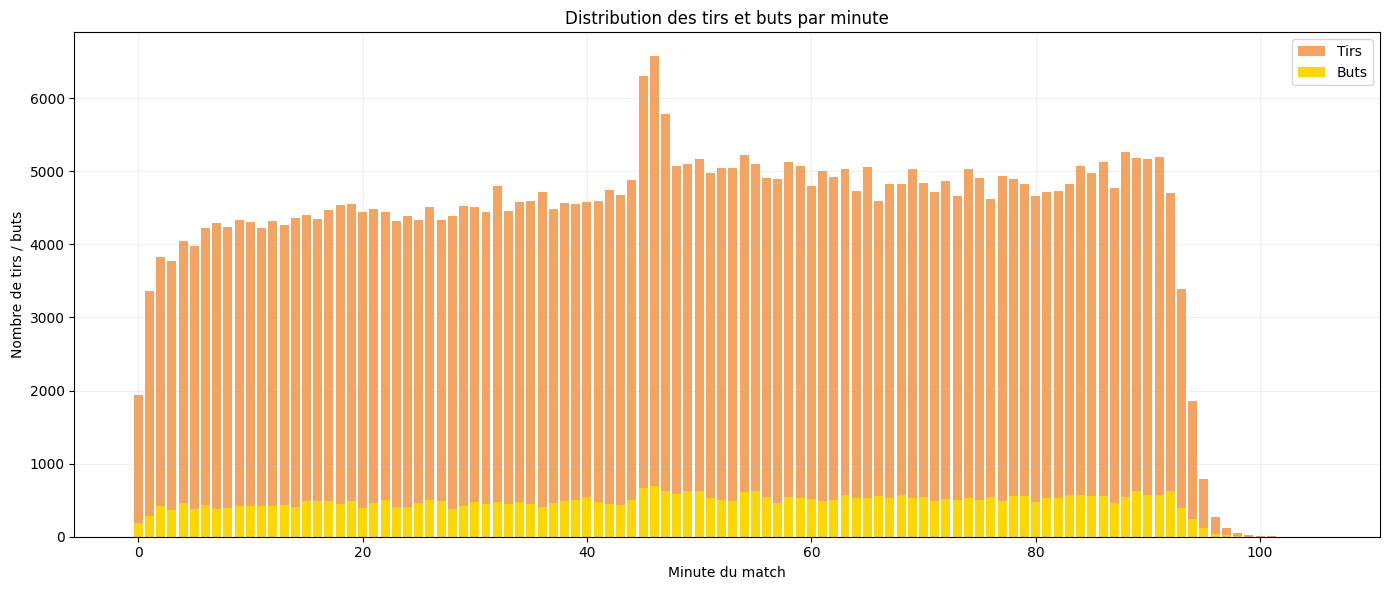

minute
0      1945
1      3360
2      3823
3      3775
4      4045
       ... 
101       5
102       3
103       3
104       1
105       1
Name: count, Length: 106, dtype: int64


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

shots_per_minute = shots['minute'].value_counts().sort_index()
goals_per_minute = shots[shots['result'] == 1]['minute'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
plt.bar(shots_per_minute.index, shots_per_minute.values, color='sandybrown', label='Tirs')
plt.bar(goals_per_minute.index, goals_per_minute.values, color='gold', label='Buts')

plt.xlabel('Minute du match')
plt.ylabel('Nombre de tirs / buts')
plt.title('Distribution des tirs et buts par minute')
plt.grid(True, alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()

print(shots_per_minute)


Analyzing the shots on goal per minute, we find a rate of around 10.6% throughout the match with a peak in the number of shots at the end of the first half

<Axes: title={'center': 'Home vs. Away Shots'}, ylabel='count'>

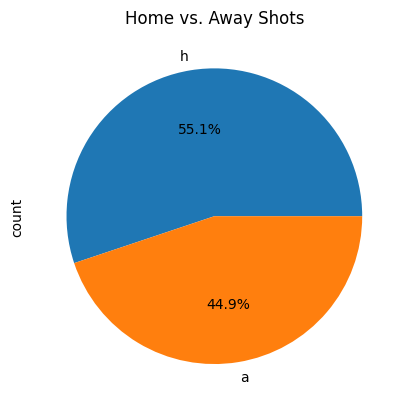

In [40]:
shots['h_a'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Home vs. Away Shots')

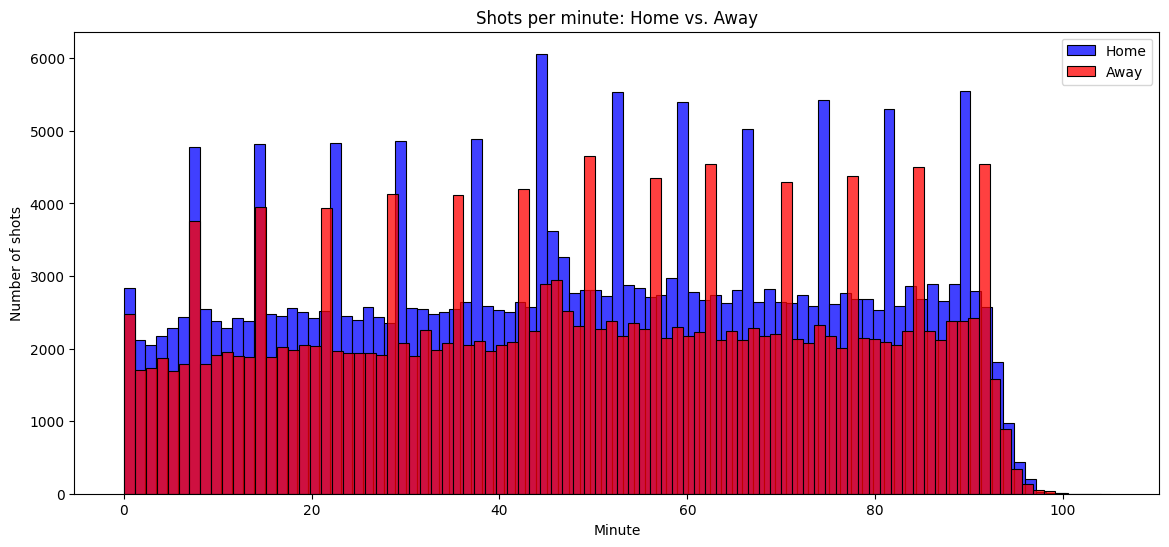

In [41]:
home = shots[shots['h_a'] == 'h']
away = shots[shots['h_a'] == 'a']

plt.figure(figsize=(14,6))
sns.histplot(data=home, x='minute', color='blue', label='Home', bins=90, kde=False)
sns.histplot(data=away, x='minute', color='red', label='Away', bins=90, kde=False)
plt.legend()
plt.title("Shots per minute: Home vs. Away")
plt.xlabel("Minute")
plt.ylabel("Number of shots")
plt.show()


When comparing shots per minute between home and away teams, we notice that the home team tends to try its luck more.

Distribution of shots by situation and type :

<Axes: title={'center': 'Distribution of shooting situations'}, xlabel='situation'>

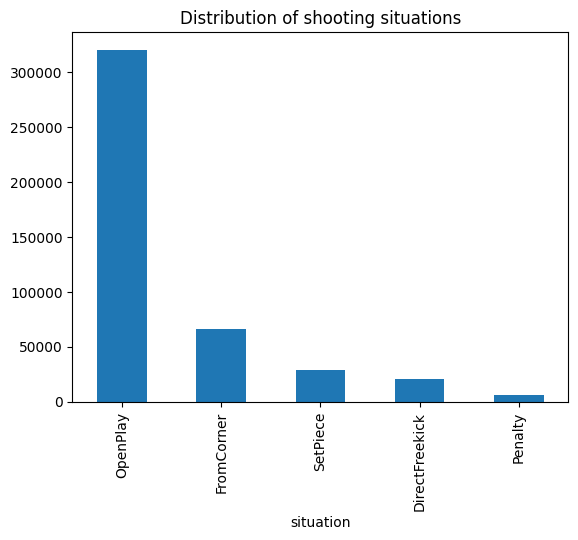

In [42]:
shots['situation'].value_counts().plot(kind='bar', title='Distribution of shooting situations')

Unsurprisingly, the vast majority of goals are scored during play.

**Overperforming players: goals > xG**

In [47]:
# Agrégation par joueur
player_stats = shots.groupby('player').agg(
    total_shots=('result', 'count'),
    total_goals=('result', 'sum'),
    total_xG=('xG Understat', 'sum')
)

# Taux de conversion réel et attendu
player_stats['conversion_rate'] = player_stats['total_goals'] / player_stats['total_shots']
player_stats['expected_conversion'] = player_stats['total_xG'] / player_stats['total_shots']

# Sur-performance = buts réels - xG
player_stats['goals_minus_xG'] = player_stats['total_goals'] - player_stats['total_xG']

# Filtrage pour les joueurs ayant un volume de tirs suffisant
filtered = player_stats[player_stats['total_shots'] > 50]

# Top sur-performeurs
top_surperformers = filtered.sort_values(by='goals_minus_xG', ascending=False).head(10)
print(top_surperformers[['total_goals', 'total_xG', 'goals_minus_xG']])


               total_goals    total_xG  goals_minus_xG
player                                                
Joao Pedro            1088  921.607871      166.392129
Fabinho                540  425.568147      114.431853
Fernando               300  206.982222       93.017778
Rafinha                204  149.902405       54.097595
Douglas                 90   36.222966       53.777034
Lionel Messi           232  196.647352       35.352648
Alex                    84   54.016665       29.983335
Hernani                 78   49.291478       28.708522
Luis Suarez            368  340.621534       27.378466
Son Heung-Min           87   62.309651       24.690349


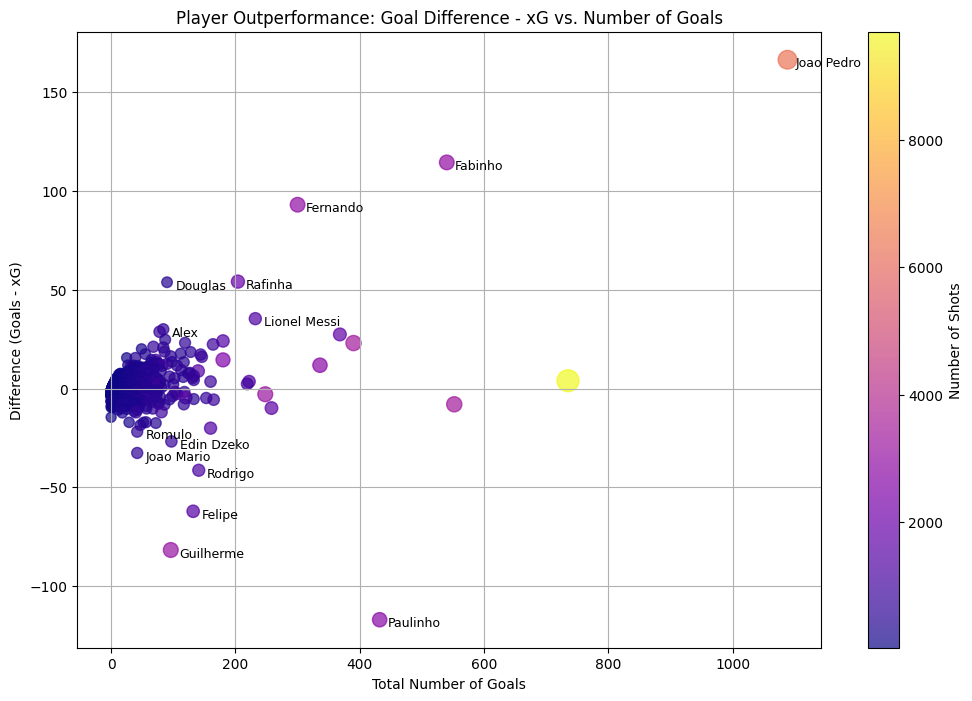

In [101]:
import matplotlib.pyplot as plt
import numpy as np

#1. Group statistics by player
player_stats = shots.groupby('player').agg(
    total_shots=('result', 'count'),
    total_goals=('result', 'sum'),
    total_xg=('xG Understat', 'sum')
).reset_index()

#2. Calculating the goal difference - xG
player_stats['diff_goals_xg'] = player_stats['total_goals'] - player_stats['total_xg']

#3. Filter players with at least 30 shots
player_stats_filtered = player_stats[player_stats['total_shots'] > 30]


#4. Sort out the overachievers
player_stats_filtered = player_stats_filtered.sort_values(by='diff_goals_xg', ascending=False)

#5. Size proportional to the number of shots
sizes = (player_stats_filtered['total_shots'] - player_stats_filtered['total_shots'].min()) / \
        (player_stats_filtered['total_shots'].max() - player_stats_filtered['total_shots'].min()) * 200 + 50

#6. Visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    player_stats_filtered['total_goals'],
    player_stats_filtered['diff_goals_xg'],
    s=sizes,
    alpha=0.7,
    c=player_stats_filtered['total_shots'],
    cmap='plasma'
)

plt.colorbar(scatter, label='Number of Shots')
plt.title('Player Outperformance: Goal Difference - xG vs. Number of Goals')
plt.xlabel('Total Number of Goals')
plt.ylabel('Difference (Goals - xG)')
plt.grid(True)

# Annoter les 10 meilleurs surperformeurs
for i, row in player_stats_filtered.head(7).iterrows():
    plt.annotate(row['player'], (row['total_goals'], row['diff_goals_xg']),
                 textcoords="offset points", xytext=(6, -5), ha='left', fontsize=9)

# Annoter les 5 plus gros sous-performeurs
for i, row in player_stats_filtered.tail(7).iterrows():
    plt.annotate(row['player'], (row['total_goals'], row['diff_goals_xg']),
                 textcoords="offset points", xytext=(6, -5), ha='left', fontsize=9)

plt.show()


With this visualization, we see the overperformers and underperformers in terms of goals scored compared to expected goals. The variable of the number of shots can explain why the extreme value represented by Joao Pedro is so far from the others: he is the second to shoot the most after Danilo (who does not really overperform).

Interactive version

In [102]:
import plotly.express as px
import pandas as pd

player_stats = shots.groupby('player').agg(
    total_shots=('result', 'count'),
    total_goals=('result', 'sum'),
    total_xg=('xG Understat', 'sum')
).reset_index()

player_stats['diff_goals_xg'] = player_stats['total_goals'] - player_stats['total_xg']

player_stats_filtered = player_stats[player_stats['total_shots'] > 30]

fig = px.scatter(
    player_stats_filtered,
    x='total_goals',
    y='diff_goals_xg',
    size='total_shots',
    color='total_shots',
    hover_name='player',
    hover_data={
        'total_goals': True,
        'diff_goals_xg': True,
        'total_shots': True,
        'total_xg': True
    },
    title='Player Outperformance: Goal Difference - xG vs. Number of Goals',
    labels={
        'total_goals': 'Number of Goals',
        'diff_goals_xg': 'Goals - xG',
        'total_shots': 'Number of Shots'
    },
    color_continuous_scale='Plasma',
    height=700
)

fig.update_layout(
    xaxis_title='Number of goals',
    yaxis_title='Difference (Goals - xG)',
    legend_title='Number of shots',
    paper_bgcolor="#cbc9d1",
    plot_bgcolor='#cbc9d1'


)

fig.show()
